In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import librosa

In [14]:
SAMPLE_RATE = 48000
SEGMENT_DURATION = int(1 * SAMPLE_RATE)
OVERLAP_DURATION = int(0.5 * SAMPLE_RATE)

In [15]:
dir_data_nad = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

In [16]:
def load_and_plot(path, list_result):
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)
    time_axis = np.linspace(0, len(audio) / sr, len(audio))

    plt.figure(figsize=(20, 4))
    plt.plot(time_axis, audio, label="Amplitude")
    plt.title("Audio waveform with loud segments marked")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for i in enumerate(list_result):
        start_time = i[1][0]
        end_time = i[1][1]
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

    plt.xticks(np.arange(0, 6.1, 0.5))
    plt.grid(which='both', alpha=0.5)
    plt.xlim(0, 6)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.legend()
    plt.show()

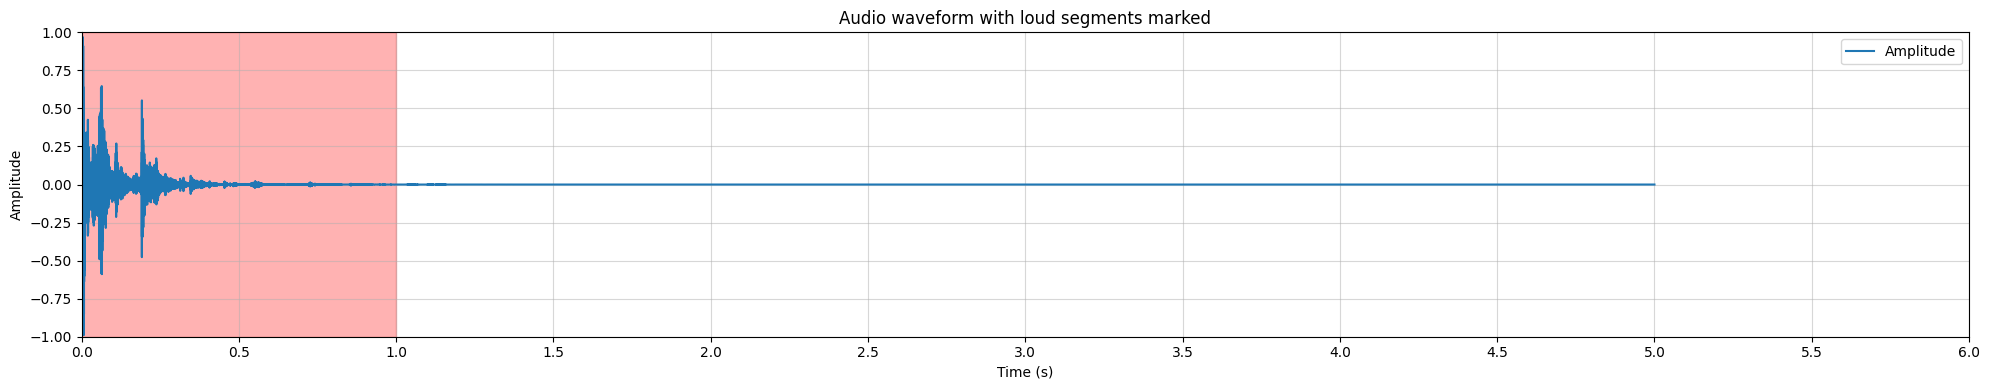

In [17]:
load_and_plot(dir_data_nad+"/1-977-A-39.wav", [[0.0, 1.0]])

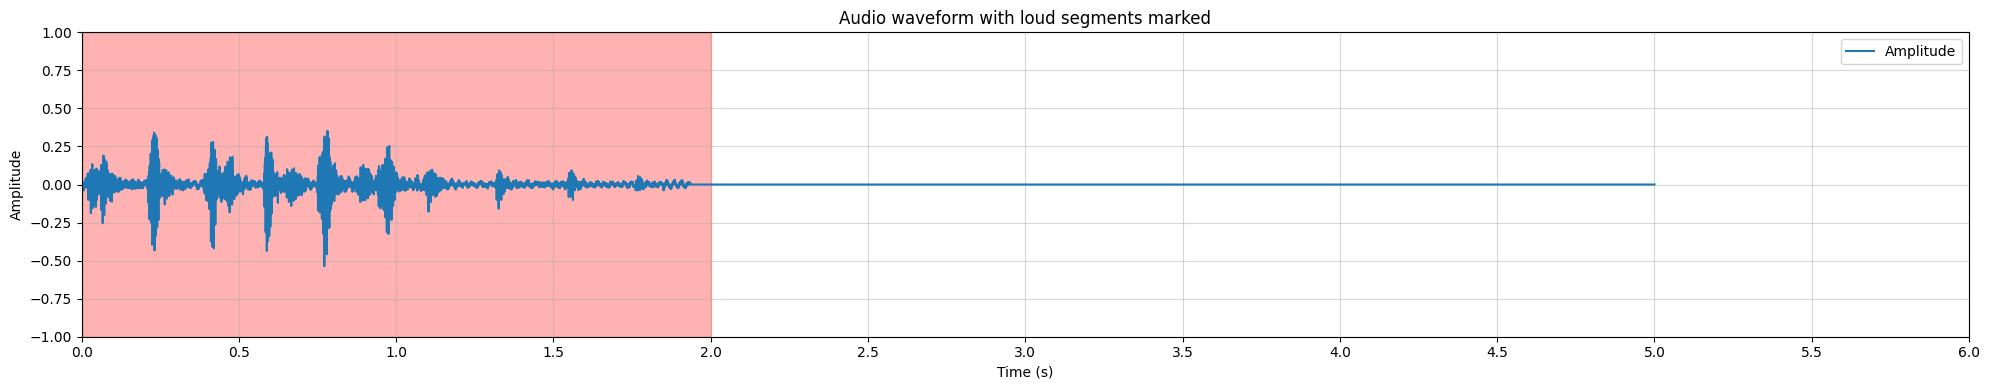

In [18]:
load_and_plot(dir_data_nad+"/1-1791-A-26.wav", [[0.0, 2.0]])

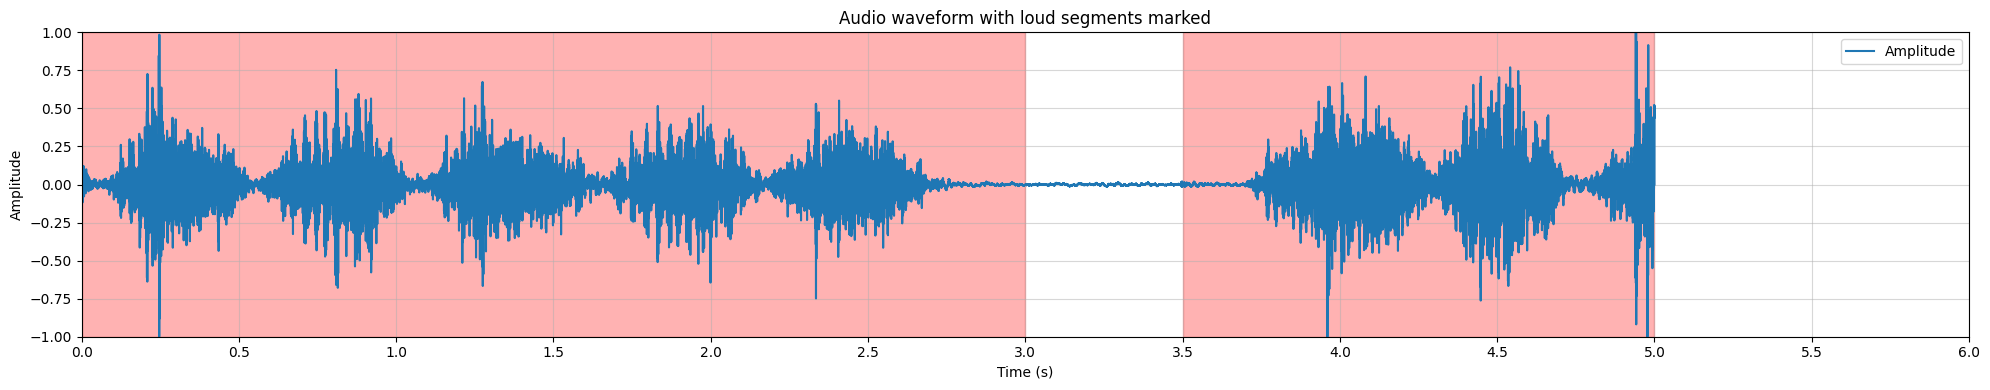

In [19]:
load_and_plot(dir_data_nad+"/1-7974-A-49.wav", [[0.0, 3.0], [3.5, 5.0]])

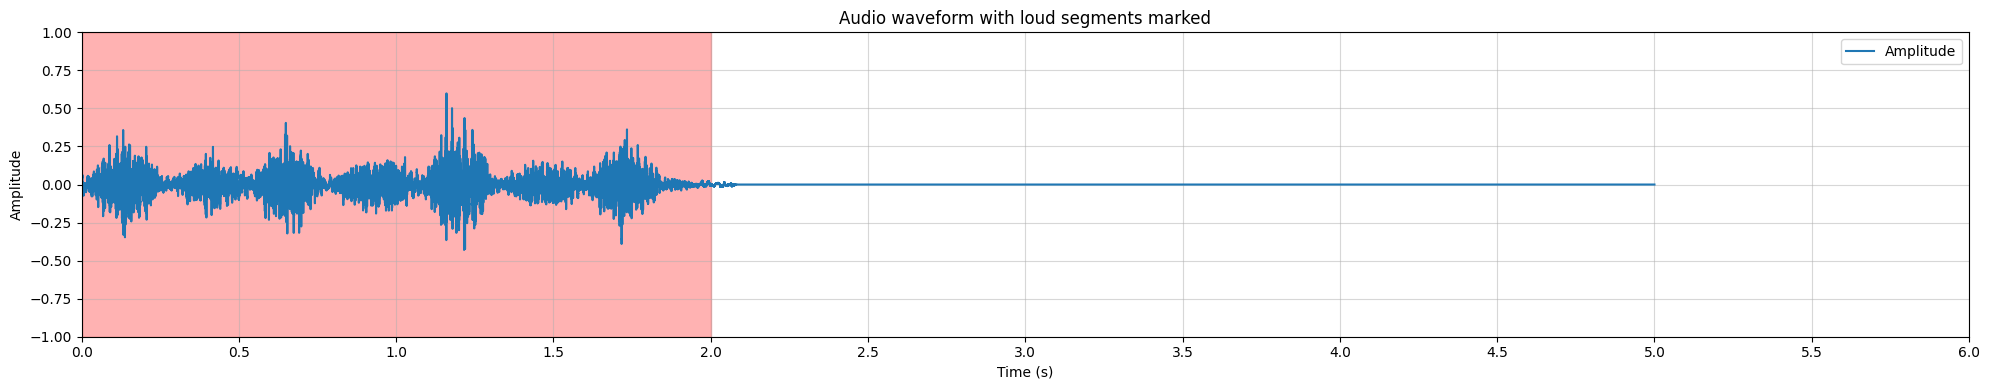

In [20]:
load_and_plot(dir_data_nad+"/1-7974-B-49.wav", [[0.0, 2.0]])

In [21]:
def label_to_segments(list_label):
    segments = []
    for label in list_label:
        start, end = label
        if end - start == 1:
            segments.append([start, end])
        else:
            current = start
            while current + 1 <= end:
                segments.append([current, current + 1])
                current += 0.5
    return segments

In [22]:
list_label_nad = [
    ["1-977-A-39.wav", [[0.0, 1.0]]],
    ["1-1791-A-26.wav", [[0.0, 2.0]]],
    ["1-7974-A-49.wav", [[0.0, 3.0], [3.5, 5.0]]],
    ["1-7974-B-49.wav", [[0.0, 2.0]]]
]

In [23]:
for label in list_label_nad:
    print(label_to_segments(label[1]))

[[0.0, 1.0]]
[[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]
[[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]
[[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]


In [25]:
list_segments_nad = [
    ["1-977-A-39.wav", [[0.0, 1.0]]],
    ["1-1791-A-26.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]],
    ["1-7974-A-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]],
    ["1-7974-B-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]]
]

print(list_segments_nad[1])

['1-1791-A-26.wav', [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]]
